# Making a Shaded Plot with a Non-linear Colormap

This tutorial shows how to use the module `tropy.plotting_tools.shaded` to make shaded plot with a non-linear colormap.

## Import Libraries

In [1]:
%matplotlib inline

# standard libs
import numpy as np
import datetime
import scipy.ndimage

# plotting and mapping
import pylab as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
sns.set_context('talk')

# the own tropy lib
import tropy.plotting_tools.shaded

## Making Example Data 

We make some random example data for plotting.

In [2]:
nrow, ncol = 180, 200
x = np.linspace(0, 1, ncol)
y = np.linspace(0, 1, nrow)

r = 4 * np.random.randn( nrow, ncol )

# smoothing
r_sm = scipy.ndimage.gaussian_filter(r, 2 )


# non-linear transformation
dset = np.exp( r_sm )

## Standard Plotting

### Internally Defined Levels

First, we plot the random data with internally defined levels.

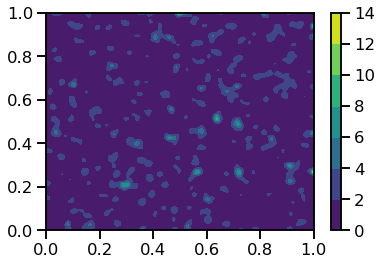

In [3]:
plt.contourf(x, y, dset)
plt.colorbar()

### Nonlinear Levels

I implemented a functionality to generate simple non-linear level in `tropy.plotting_tools.shaded`

In [4]:
help( tropy.plotting_tools.shaded.set_levs )

Help on function set_levs in module tropy.plotting_tools.shaded:

set_levs(nmax, depth, largest=5, sym=True, sign=True, zmax='None')
    Makes a non-linear level set based on pre-defined numbers.
    
    
    Parameters
    ----------
    nmax : int
        exponent of maximum number
    
    depth : int
        number of iterations used down to scales of 10**(nmax - depth)
    
    largest : {5, 8}, optional
        set the largest number in the base array either to 5 or 8
    
    sym : {True, False}, optional
        switch if levels are symmetric around origin
    
    sign : {True, False}, optional
        switches sign if negative
    
    zmax : float, optional, default = 'none'
        limiter for levels, |levs| > zmax are not allowed
    
    
    Returns
    --------
    levs : np.array
        set of non-linear levels



Let's first play with the function.

In [5]:
tropy.plotting_tools.shaded.set_levs( 0, 1 )

array([-5., -3., -2., -1.,  0.,  1.,  2.,  3.,  5.])

In [6]:
tropy.plotting_tools.shaded.set_levs( 1, 1 )

array([-50., -30., -20., -10.,   0.,  10.,  20.,  30.,  50.])

In [7]:
tropy.plotting_tools.shaded.set_levs( 0, 2 )

array([-5. , -3. , -2. , -1. , -0.5, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,
        0.3,  0.5,  1. ,  2. ,  3. ,  5. ])

Okay, we see how different levels and depths can be set...

In [8]:
levels = tropy.plotting_tools.shaded.set_levs( 0, 2, sym = False )
levels

array([0. , 0.1, 0.2, 0.3, 0.5, 1. , 2. , 3. , 5. ])

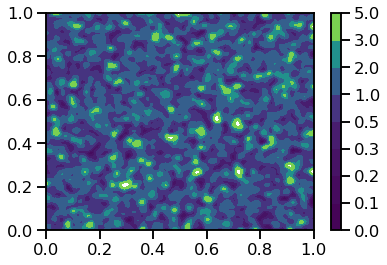

In [9]:
plt.contourf(x, y, dset, levels, vmax = levels.max() )
plt.colorbar()

## Non-linear Shadings

Let's look at the plotting function.

In [10]:
help( tropy.plotting_tools.shaded.shaded )

Help on function shaded in module tropy.plotting_tools.shaded:

shaded(x, y, z, *args, **kwargs)
    The function shaded is a wrapper for the pylab function contourf.
    
    
    In addition to contourf, shaded can plot filled contours for which
    a non-linear colormap is used.
    
    
    Parameters
    ----------
    x : np.array 
        x-values passed to `plt.contourf`
    
    y : np.array 
        y-values passed to `plt.contourf`
    
    z : np.array 
        z-values passed to `plt.contourf` (color value)
    
    *args : list
        other positional arguments passed to `plt.contourf`
    
    **kwargs : dict
        other optional arguments passed to `plt.contourf`
    
        special keywords:
    
        * 'levels' : numpy array of color / contour levels
    
        * 'lev_depth' : gives the depth of an automatically generated level set
          i.e. an initial base (e.g. [1,2,3,5] ) that contains
          the maximum value of the field (e.g. 4.3) is downscaled

### With Pre-Defined Levels

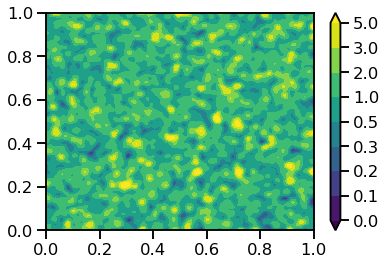

In [11]:
tropy.plotting_tools.shaded.shaded(x, y, dset, levels = levels, vmax = levels.max(), cmap = plt.cm.viridis )
plt.colorbar()

### With Internally-Defined Levels

It is also possible to run the plotting with internally generated levels:

* using only one "cascade" (`lev_depth = 1`)

/vols/fs1/store/senf/.conda/python37/lib/python3.7/site-packages/tropy/plotting_tools/shaded.py:281: UserWarning: The following kwargs were not used by contour: 'lev_depth'
  return py.contourf(x, y, z, *args, **kwargs)


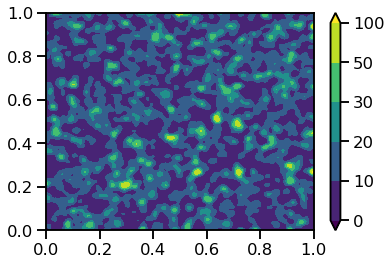

In [12]:
tropy.plotting_tools.shaded.shaded(x, y, 10 * dset, cmap = plt.cm.viridis, lev_depth = 1 )
plt.colorbar()


* or using e.g. two "cascades" (`lev_depth = 2`)

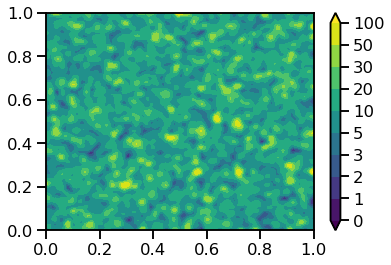

In [14]:
tropy.plotting_tools.shaded.shaded(x, y, 10 * dset, cmap = plt.cm.viridis, lev_depth = 2 )
plt.colorbar()

## Summary

The module `tropy.plotting_tools.shaded`  help you to 

* automatically generate a set of non-linear levels based on simple digits, e.g. [1, 2, 3, 5]
* to use non-linear levels in filled contour plots.